In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


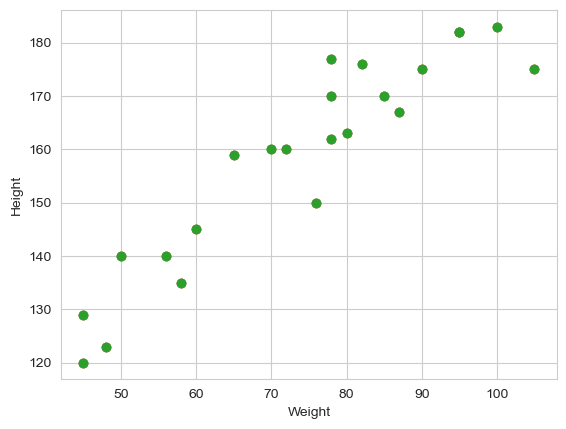

In [7]:
##scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [5]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


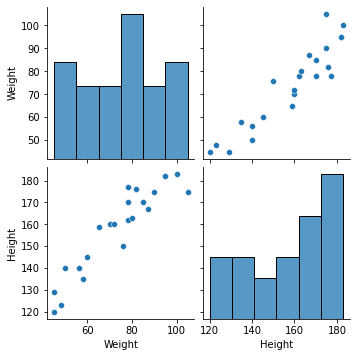

In [9]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [12]:
## Independent and dependent features
X=df[['Weight']] ### independent features should be data frame or 2 dimesnionalarray
y=df['Height'] ## this variiable can be in series or 1d array
np.array(X).shape

(23, 1)

In [10]:
X_series=df['Weight']
np.array(X_series).shape

(23,)

In [13]:
np.array(y).shape

(23,)

In [18]:
## Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ## Standardization


In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [32]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [33]:
X_test=scaler.transform(X_test)

In [34]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [21]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression


In [22]:
regression=LinearRegression(n_jobs=-1)

In [23]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [24]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [1.04792503]
Intercept: 80.52684512622541


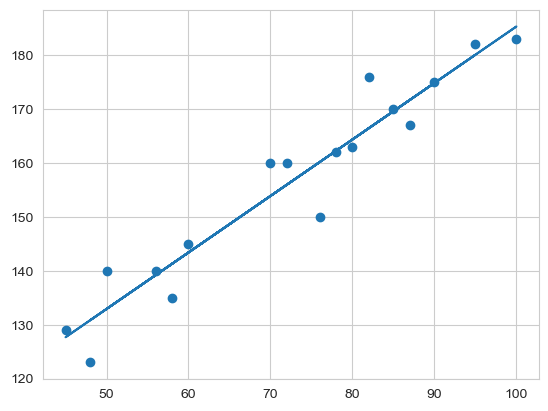

In [33]:
## plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =156.470 + 17.29(X_test)

In [34]:
## Prediction for test data
y_pred=regression.predict(X_test)

In [35]:
## Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [36]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [37]:
from sklearn.metrics import r2_score

In [39]:
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [45]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [46]:
## OLS Linear Regression
import statsmodels.api as sm

6

In [47]:
model=sm.OLS(y_train,X_train).fit()

In [49]:
prediction=model.predict(X_test)
print(prediction)

15    164.134205
9     164.134205
0      94.692811
8     199.907045
17    136.778504
12    220.949891
dtype: float64


In [50]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1133.
Date:                Sun, 06 Apr 2025   Prob (F-statistic):                    2.80e-16
Time:                        21:53:14   Log-Likelihood:                         -73.806
No. Observations:                  17   AIC:                                      149.6
Df Residuals:                      16   BIC:                                      150.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/envs/leo312/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [52]:
## Prediction For new data
regression.predict(scaler.transform([[72]]))

NameError: name 'scaler' is not defined